In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv
/kaggle/input/kuc-hackathon-winter-2018/drugsComTest_raw.csv


In [3]:
df=pd.read_csv('/kaggle/input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv')

In [4]:
df.shape

(161297, 7)

In [5]:
def sentiment(df):
  df.loc[df.rating<4,'Sentiment']="Negative"
  df.loc[(df.rating>=4) & (df.rating<7) ,'Sentiment']="Neutral"
  df.loc[(df.rating>=7),'Sentiment']="Positive"
  return df

In [6]:
df=sentiment(df)

In [7]:
df.loc[df.Sentiment=='Negative',['rating']].head(20)

,rating
5,2
6,1
8,1
14,3
24,1
33,1
36,1
38,2
51,1
53,1


In [8]:
df['drugName'].value_counts()


Levonorgestrel                       3657
Etonogestrel                         3336
Ethinyl estradiol / norethindrone    2850
Nexplanon                            2156
Ethinyl estradiol / norgestimate     2117
                                     ... 
Ferrous fumarate                        1
Anucort-HC                              1
Capmist DM                              1
Hyosyne                                 1
Extina                                  1
Name: drugName, Length: 3436, dtype: int64

Text(0.5, 1.0, 'Ratings vs No.of reviews')

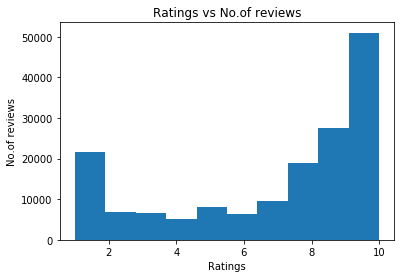

In [10]:
plt.hist(df['rating'])
plt.xlabel("Ratings")
plt.ylabel("No.of reviews")
plt.title("Ratings vs No.of reviews")

In [ ]:
df.head()

In [11]:
df=df.drop(['uniqueID','drugName','condition','date','usefulCount'],axis=1)

In [ ]:
df.head()

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk import word_tokenize
from nltk.corpus import stopwords 

In [13]:
def prepro(df):
    tokens=word_tokenize(df)
    stemmer=SnowballStemmer('english',ignore_stopwords=True)
    stemmed=[stemmer.stem(word) for word in tokens]
    words=[word for word in stemmed if word.isalpha()]
    stop_words=set(stopwords.words('english'))
    st=[w for w in words if not w in stop_words]
    return st

In [ ]:
df['review']=df.apply(lambda row:prepro(row['review']),axis=1)


In [ ]:
X=df.drop('Sentiment',axis=1)
y=df['Sentiment']
X.shape
y.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42,stratify=y)
X_train.shape

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer()
train_Xv=vectorizer.fit_transform(X_train['review'].astype(str))
test_Xv=vectorizer.transform(X_test['review'].astype(str))

In [ ]:
train_Xv
y_train.shape

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
params={'hidden_layer_sizes':[(100,),(150,100),(150,75)],'learning_rate_init':[0.01,0.001,0.1,1],'activation';['relu','logistic'],'solver':['sgd','adam']}
clf = MLPClassifier(solver='adam',activation='relu',hidden_layer_sizes=(150,75),max_iter=2000,batch_size=27017,learning_rate_init=0.01)
rs=RandomizedSearchCV(clf,params,random_state=1, cv=5, verbose=0,n_jobs=-1)

In [ ]:
clf.fit(train_Xv,y_train)

In [ ]:
clf.score(test_Xv,y_test)

In [ ]:
df['review'][30]